In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,38578,None,None,85821.320486
2020-06-13,38579,None,None,79734.513019
2020-06-14,38580,None,None,74080.733344
2020-06-15,38581,None,None,68754.868044
2020-06-16,38582,None,None,64011.008101
...,...,...,...,...
2021-03-11,38850,None,None,106083.697291
2021-03-12,38851,None,None,101790.262474
2021-03-13,38852,None,None,97668.715352


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-15_2021-03-15-16-30.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-14_2021-03-14-18-02.pickle


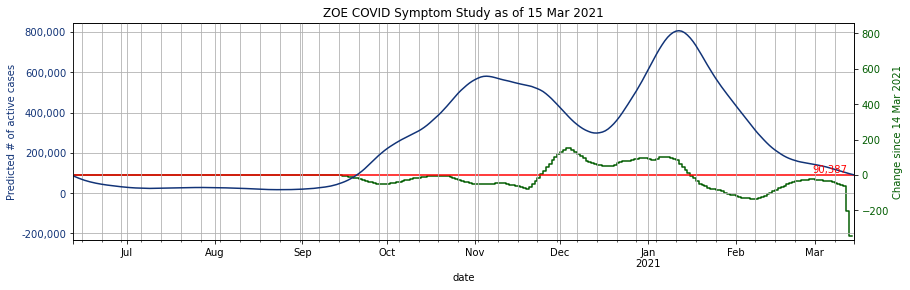

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

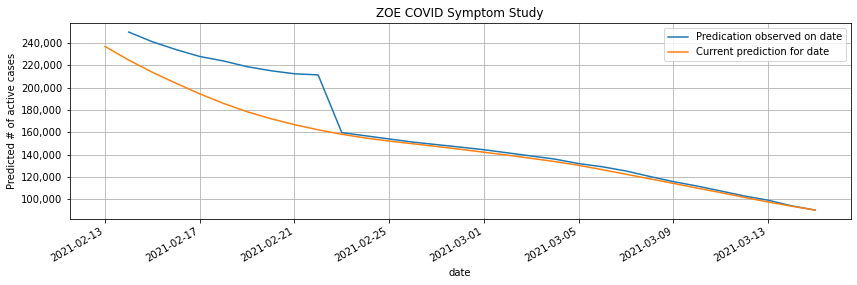

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-03-15_2021-03-15-16-30.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
280,Doncaster,E08000017,1.020596
272,Tameside,E08000008,0.743212
372,Moray,S12000020,0.713131
311,South Ayrshire,S12000028,0.712596
194,Staffordshire Moorlands,E07000198,0.712081
25,Leicester,E06000016,0.633682
161,East Lindsey,E07000137,0.606715
112,Eastbourne,E07000061,0.604173
232,Welwyn Hatfield,E07000241,0.502331
268,Oldham,E08000004,0.479767
